In [123]:
import pandas as pd
import numpy as np
import statsmodels.stats.inter_rater as inter
# 
df2=pd.read_csv("./survey2/amir_answers.csv")
df1=pd.read_csv("./survey2/abram_answers.csv")
df1=df1.drop(columns=["Unnamed: 2","Unnamed: 3"])
df3=pd.read_csv("./survey2/mme_answers.csv")

df1.columns=["name","drum_category"]
df2.columns=["name","drum_category"]
df3.columns=["name","stack_size","drum_category","iteration"]

In [151]:
df1=df1[["name","drum_category"]]
df2=df2[["name","drum_category"]]
#check to see if they're sorted the same way
print(np.sum(df1["name"]==df2["name"]),
      np.sum(df3["name"]==df2["name"]),
      np.sum(df3["name"]==df2["name"]))
df=pd.DataFrame()
df["name"]=df1["name"].copy()

df["abram"]=df1["drum_category"]
df["amir"]=df2["drum_category"]
df["mme"]=df3["drum_category"]

df=df.drop(["name"],axis=1)

300 300 300


In [185]:
df=df.replace("kick","k")
df=df.replace("snare","s")
df=df.replace("hat","h")
df=df.replace("clap","c")
print("there are 4 common categories and 300 samples. The bad and other categories are only for persons")
print("amir has opted to select other category %d times and thinks %d samples are bad"%(sum(df["amir"]=="o"),sum(df["amir"]=="b")))
print("abram has opted to select other category %d times and thinks %d samples are bad"%(sum(df["abram"]=="o"),sum(df["abram"]=="b")))
print("abram agreeing with mme",np.sum(df["abram"]==df["mme"]))
print("amir agreeing with mme",np.sum(df["amir"]==df["mme"]))
print("abram agreeing with amir",np.sum(df["abram"]==df["amir"]))
print("both persons agreeing with mme",np.sum((df["abram"]==df["amir"]) &
                                        (df["abram"]==df["mme"])))


there are 4 common categories and 300 samples. The bad and other categories are only for persons
amir has opted to select other category 54 times and thinks 67 samples are bad
abram has opted to select other category 15 times and thinks 133 samples are bad
abram agreeing with mme 98
amir agreeing with mme 105
abram agreeing with amir 134
both persons agreeing with mme 60


In [187]:
#make a 2d array for fleiss kappa
cats=["b","o","h","k","s","c"]
def count_cats(i,r):
    cat_counts=[0]*len(cats)
    for c in r:
        j=cats.index(c)
        cat_counts[j]=cat_counts[j]+1
    M.append(cat_counts) 

M=[]
for i,r in df.iterrows():
    count_cats(i,r)
np.array(M).shape


(300, 6)

In [188]:
print("kappa of 2  people")
M=[]
for i,r in df[["abram","amir"]].iterrows():
    count_cats(i,r)
inter.fleiss_kappa(M,method='uniform')


kappa of 2  people


0.336

In [189]:
print("kappa of people + mme")
M=[]
for i,r in df[["amir","abram","mme"]].iterrows():
    count_cats(i,r)
inter.fleiss_kappa(M,method='uniform')

kappa of people + mme


0.24933333333333335

# Dropping bad or other samples

In [190]:
#what happens if we delete the bad rows?

df_nb= df[~((df["abram"]=="b") | (df["amir"]=="b") ) ]  #all bads
# df_nb= df[~((df["abram"]=="b") | (df["amir"]=="b") | (df["amir"]=="o") | (df["abram"]=="o")) ] #all bads and others
print(df_nb.shape)
print("kappa of 2 persons")
M=[]
for i,r in df_nb[["abram","amir"]].iterrows():
    count_cats(i,r)
print(inter.fleiss_kappa(M,method='uniform'))

print("kappa of people + mme")
M=[]
for i,r in df_nb[["amir","abram","mme"]].iterrows():
    count_cats(i,r)
print(inter.fleiss_kappa(M,method='uniform'))


(151, 3)
kappa of 2 persons
0.45960264900662257
kappa of people + mme
0.4728476821192053


In [191]:
print("kappa of 2 persons")
M=[]
for i,r in df_nb[["abram","amir"]].iterrows():
    count_cats(i,r)
inter.fleiss_kappa(M,method='uniform')

kappa of 2 persons


0.45960264900662257

In [192]:
print("kappa of people + mme")
M=[]
for i,r in df_nb[["amir","abram","mme"]].iterrows():
    count_cats(i,r)
inter.fleiss_kappa(M,method='uniform')

kappa of people + mme


0.4728476821192053

In [137]:
all_predictions=pd.read_csv("survey2/mme_answers.csv")
all_predictions.columns=["name","stack_size","drum_category","iteration"]
vmme=all_predictions["drum_category"].value_counts().sort_index(ascending=True)

vab=df["abram"].value_counts().sort_index(ascending=True)
va=df["amir"].value_counts().sort_index(ascending=True)
print(vmme.to_frame().T,"\n",vab.to_frame().T,"\n",va.to_frame().T)

               clap  hat  kick  snare
drum_category    75   75    75     75 
          b   c   h   k   o   s
abram  133  10  39  60  15  43 
        b   c   h   k   o   s
amir  67  19  36  58  54  66


In [81]:
# [b , c, h , k , o , s]
def percentage_calc(a):
    name=a[0]
    vals=a[1:]
    s=np.sum(vals)
    percentaged=[v/s for v in vals]
    return [name]+percentaged

# mme=percentage_calc(["MEM",0,690,2049,803,0,1098]) #calculated from shell
mme=percentage_calc(["Ground Truth",0,75,75,75,0,75]) #calculated from shell

p1=percentage_calc(["Person1",133,10,39,60,15,43 ]) #amir
p2=percentage_calc(["Person2",67,19,36,58,54,66]) #abram

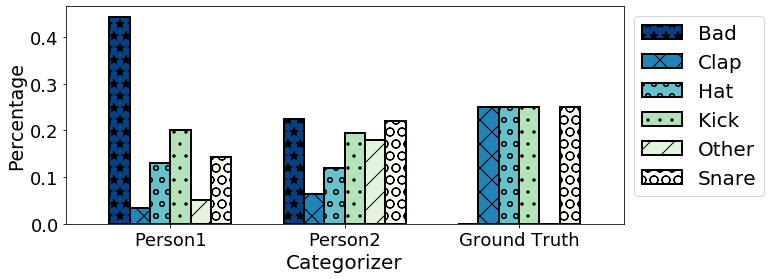

In [82]:

import matplotlib
import matplotlib.pyplot as plt

import matplotlib as mpl


from matplotlib import cm



bf=pd.DataFrame(columns=["categorizer","Bad","Clap","Hat","Kick","Other","Snare"],
               data=[p1,p2,mme])
bf=bf.set_index("categorizer")

c=cm.get_cmap("GnBu_r",10)



# plt.figure(figsize=(2,1))
ax=bf.plot(kind='bar',rot=0,color=c(np.linspace(0.05,1,6)),linewidth=2, width=0.7)
patterns =('-', '+', 'x','/','//','O','o','\\','\\\\')
bars = ax.patches
hatches = ''.join(h*len(bf) for h in ["*","x","o",".","/","O"])

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    bar.set_edgecolor("black")
    bar.set_linewidth(2)
    
plt.gcf().set_size_inches(10, 4)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left', ncol=1,prop={'size': 20},)
plt.ylabel("Percentage",fontsize=19)
plt.xlabel("Categorizer",fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)
# plt.title("Categorization Proportions",fontsize=)
# plt.show()
plt.savefig("cat_mme.pdf",bbox_inches='tight',dpi=1000)
